# Testing scib metrics on endothelial seacells integration with scvi implementation of scib

In [1]:
import scanpy as sc
import pandas as pd
import scvi
from scib_metrics.benchmark import Benchmarker

Global seed set to 0


In [2]:
initDir = '/group/testa/Project/OvarianAtlas/atlas_project/raw_data/integration/metacells/endothelial/'

In [13]:
adata_list={'seacells_hdg_patients_batch_corr_scgen_tissuetreat_embeddings_2500.h5ad':'scGen_HVG',
            'seacells_hdg_patients_batch_corr_scgen_tissuetreat_embeddings_HDG.h5ad':'scGen_HDG',
            'seacells_hdg_patients_batch_corr_scVI_tissuetreat_embeddings_2500.h5ad':'scVI_HVG',
            'seacells_hdg_patients_batch_corr_scANVI_tissuetreat_embeddings_2500.h5ad':'scANVI_HVG',
            'seacells_hdg_patients_batch_corr_scVI_tissuetreat_embeddings_HDG.h5ad':'scVI_HDG',
            'seacells_hdg_patients_batch_corr_scANVI_tissuetreat_embeddings_HDG.h5ad':'scANVI_HDG'}

In [14]:
# Load the first AnnData object to store all embeddings
first_file = list(adata_list.keys())[0]
adata_first = sc.read(initDir + first_file)

In [5]:
# Function to get the correct embedding key based on the filename
def get_embedding_key(filename):
    if 'scgen' in filename.lower():
        return 'corrected_latent'
    elif 'scvi' in filename.lower():
        return 'X_scVI'
    elif 'scanvi' in filename.lower():
        return 'X_scANVI'
    else:
        raise ValueError(f"Unknown embedding type for file: {filename}")

In [15]:
# Iterate over each file, load the AnnData object, and extract the embeddings
for file, label in adata_list.items():
    adata = sc.read_h5ad(initDir + file)
    embedding_key = get_embedding_key(file)
    embeddings = adata.obsm[embedding_key]
    adata_first.obsm[label] = embeddings

In [16]:
adata_first

AnnData object with n_obs × n_vars = 3333 × 2500
    obs: 'ID', 'sample_name', 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'patient_id', 'dataset', 'cell_type', 'cell_subtype', 'sample_ID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'CancerMSK', 'EndothelialMSK', 'FibroblastsMSK', 'HematopoieticMSK', 'cell_labels_ratio', 'max', 'assignment', 'leiden-1.8', 'SEACell', '# Single Cells', 'tissue-treatment', '_scvi_batch', '_scvi_labels', 'concat_batch', 'S_score', 'G2M_score', 'phase'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'dataset_colors', 'neighbors', 'paper_ID_colors', 'pca', 'phase_colors', 'tissue-treatment_colors', 'tissue_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'corrected_latent', 'latent', 'scGen_HVG', 'scGen_HDG', 'scVI_HVG', 'scANVI_HVG', 'scVI_HDG', 'scANVI_HDG'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [18]:
bm = Benchmarker(
    adata_first,
    batch_key="paper_ID",
    label_key="tissue-treatment",
    embedding_obsm_keys=['scGen_HVG', 'scGen_HDG', 'scVI_HVG', 'scANVI_HVG', 'scVI_HDG', 'scANVI_HDG'],
    n_jobs=-1,
)
bm.benchmark()

Embeddings:   0%|          | 0/6 [00:00<?, ?it/s]

INFO     Ascites_CHT consists of a single batch or is too small. Skip.                                             
INFO     Ascites_NACT consists of a single batch or is too small. Skip.                                            
INFO     Primary_CHT consists of a single batch or is too small. Skip.                                             


/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Embeddings:  17%|█▋        | 1/6 [00:11<00:57, 11.55s/it]

INFO     Ascites_CHT consists of a single batch or is too small. Skip.                                             
INFO     Ascites_NACT consists of a single batch or is too small. Skip.                                            
INFO     Primary_CHT consists of a single batch or is too small. Skip.                                             


/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Embeddings:  33%|███▎      | 2/6 [00:22<00:43, 10.97s/it]

INFO     Ascites_CHT consists of a single batch or is too small. Skip.                                             
INFO     Ascites_NACT consists of a single batch or is too small. Skip.                                            
INFO     Primary_CHT consists of a single batch or is too small. Skip.                                             


/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Embeddings:  50%|█████     | 3/6 [00:30<00:28,  9.57s/it]

INFO     Ascites_CHT consists of a single batch or is too small. Skip.                                             
INFO     Ascites_NACT consists of a single batch or is too small. Skip.                                            
INFO     Primary_CHT consists of a single batch or is too small. Skip.                                             


/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Embeddings:  67%|██████▋   | 4/6 [00:37<00:17,  8.57s/it]

INFO     Ascites_CHT consists of a single batch or is too small. Skip.                                             
INFO     Ascites_NACT consists of a single batch or is too small. Skip.                                            
INFO     Primary_CHT consists of a single batch or is too small. Skip.                                             


/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Embeddings:  83%|████████▎ | 5/6 [00:43<00:07,  7.90s/it]

INFO     Ascites_CHT consists of a single batch or is too small. Skip.                                             
INFO     Ascites_NACT consists of a single batch or is too small. Skip.                                            
INFO     Primary_CHT consists of a single batch or is too small. Skip.                                             


/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Embeddings: 100%|██████████| 6/6 [00:49<00:00,  8.21s/it]


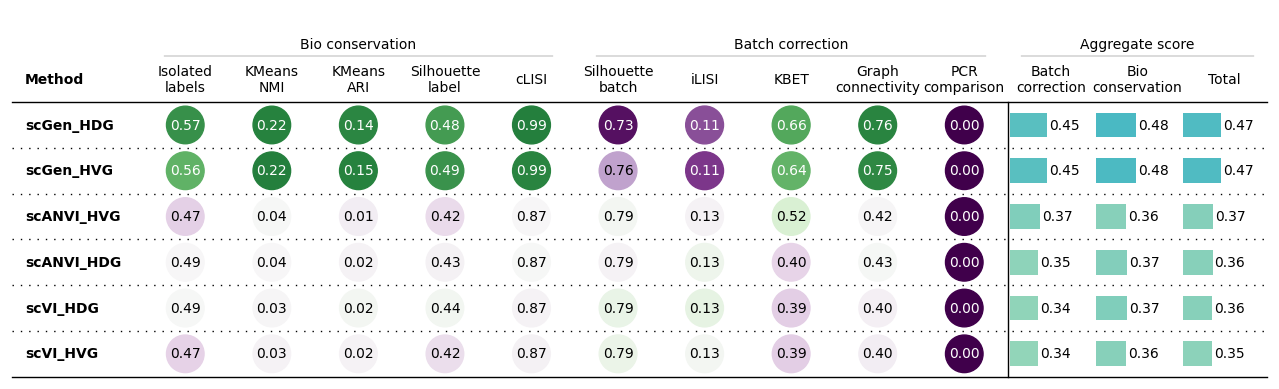

In [19]:
bm.plot_results_table(min_max_scale=False)

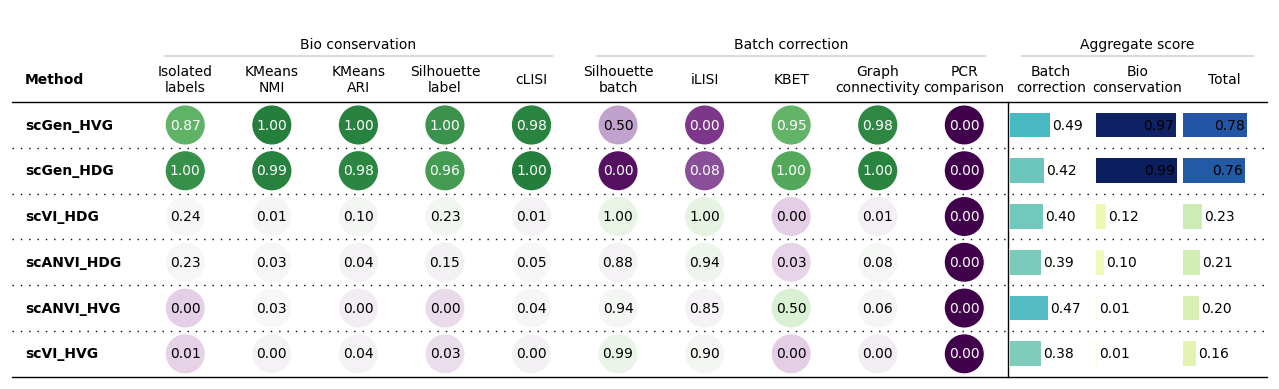

In [20]:
bm.plot_results_table(min_max_scale=True)

In [21]:
df = bm.get_results(min_max_scale=False)
print(df)

              Isolated labels        KMeans NMI        KMeans ARI  \
Embedding                                                           
scGen_HVG            0.559614          0.220127          0.146738   
scGen_HDG            0.573484          0.218179          0.143446   
scVI_HVG             0.468545          0.032541          0.016831   
scANVI_HVG           0.467924          0.038685          0.011734   
scVI_HDG              0.49301          0.034595          0.024923   
scANVI_HDG           0.491879          0.037695          0.017144   
Metric Type  Bio conservation  Bio conservation  Bio conservation   

             Silhouette label             cLISI  Silhouette batch  \
Embedding                                                           
scGen_HVG            0.485312          0.985183          0.762226   
scGen_HDG            0.482904          0.987008          0.730864   
scVI_HVG             0.422568          0.869329          0.792707   
scANVI_HVG           0.420883    

In [22]:
adata_first.write_h5ad(initDir + 'seacells_endothelial_batch_corr_metrics.h5ad')